In [1]:
from PIL import Image
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

In [2]:
img = Image.open("image_capturee.jpg")
img_data = img.getdata()

lst=[]
for i in img_data:

    # lst.append(i[0]*0.299+i[1]*0.587+i[2]*0.114) ### Rec. 609-7 weights
    lst.append(i[0]*0.2125+i[1]*0.7174+i[2]*0.0721) ### Rec. 709-6 weights

new_img = Image.new("L", img.size)
new_img.putdata(lst)

new_img.show()
new_img.save("imagem.png")

In [3]:
img7 = Image.open("imagem.png")

In [4]:
img_gray = img7.convert("L")

img_array = np.array(img_gray)

threshold = 138
binary_matrix = (img_array > threshold).astype(np.uint8)
print(binary_matrix)


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [5]:
neighborhood_size = 2 

neighb= neighborhood_size

ematrix = np.pad(binary_matrix, neighb, mode='constant', constant_values=0)
print(ematrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
lig, colon = ematrix.shape


print("Matrix Height:", lig)
print("Matrix Width:", colon)

Matrix Height: 369
Matrix Width: 284


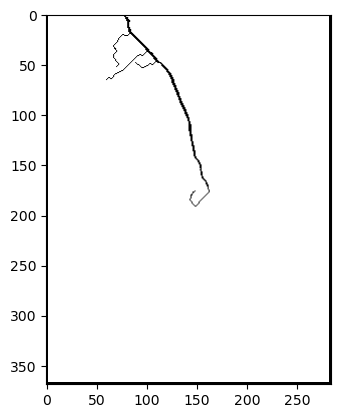

In [7]:
c1=0.15
c2=0.05

c3=0.002
c4=0.0001
p3=0.5
p4=0.01
p5=0.0000000 
p00=0.0000
c5=0.00001
pi1=0.4
pi2=0.3
pi3=0.4
pi4=0.4
pi5=0.3
pi52=0.15
pi6=0.1
pi7=0.3

pi9=0.05
pi10=0.1
pi11=0.2
pi12=0.1
pi13=0.15
pe=0.00001
pi_low=0.00000
rows = 369
cols = 284



grid = np.pad(binary_matrix, neighb, mode='constant', constant_values=0)


grid_states = [grid.copy()]

def update_grid(grid):
    new_grid = grid.copy()
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 1:
                
                neighbors = [
                    new_grid[i-2, j-2], new_grid[i-2, j-1], new_grid[i-2, j], new_grid[i-2, j+1], new_grid[i-2, j+2],
                    new_grid[i-1, j-2], new_grid[i-1, j-1], new_grid[i-1, j], new_grid[i-1, j+1], new_grid[i-1, j+2],
                    new_grid[i, j-2], new_grid[i, j-1], new_grid[i, j+1], new_grid[i, j+2],
                    new_grid[i+1, j-2], new_grid[i+1, j-1], new_grid[i+1, j], new_grid[i+1, j+1], new_grid[i+1, j+2],
                    new_grid[i+2, j-2], new_grid[i+2, j-1], new_grid[i+2, j], new_grid[i+2, j+1], new_grid[i+2, j+2]
                ]
                if neighbors in [
                    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,1,  1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
                ]:
                    if random.random() < pi1:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , 
                    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1] , 
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
                    
                    
                ]:
                    if random.random() < pi2:
                        new_grid[i, j] = 0  
                             
                elif neighbors in [
                    [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < pi3:
                        new_grid[i, j] = 0
                
                elif neighbors in [
                    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , 
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
                    
                         
                ]:
                    if random.random() < pi4:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
                    
                ]:
                    if random.random() < pi5:
                        new_grid[i, j] = 0   
                        
                elif neighbors in [
                    [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
                ]:
                    if random.random() < pi6:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0] ,
                    [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
                  
                
                ]:
                    if random.random() < pi7:
                        new_grid[i, j] = 0
                            
                
                        
                elif neighbors in [
                    [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , 
                    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
                    
                    
                ]:
                    if random.random() < pi9:
                        new_grid[i, j] = 0    
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0] ,
                    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
                                      
                ]:
                    if random.random() < pi10:
                        new_grid[i, j] = 0    
            
                elif neighbors in [
                    [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    
                    [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
                ]:
                    if random.random() < pi11:
                        new_grid[i, j] = 0  
                        
                elif neighbors in [
                    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]
                    
                ]:
                    if random.random() < pi12:
                        new_grid[i, j] = 0   
                        
                elif neighbors in [
                    [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1] ,
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
                    
                    
                ]:
                    if random.random() < pi13:
                        new_grid[i, j] = 0    
                 
                elif neighbors in [
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
                    
                ]:
                    if random.random() < p00:
                        new_grid[i, j] = 0 
                        
               # elif random.random() < pi_low:
                       # new_grid[i, j] = 0 
                            
                 

    new_grid[0, :] = 0  
    new_grid[-1, :] = 0  
    new_grid[:, 0] = 0  
    new_grid[:, -1] = 0  

    return new_grid
                    

iterations = 30

for _ in range(iterations):
    grid = update_grid(grid)
    grid_states.append(grid.copy())


for i, state in enumerate(grid_states):
    plt.imshow(state, cmap='gray', vmin=0, vmax=1)  
    plt.savefig(f'pc_y2_30it_{i}.png', dpi=1200)
